In [1]:
from sklearn.datasets import load_digits

In [2]:
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore", category=Warning)

In [3]:
digits = load_digits()

In [4]:
y = digits.target == 9

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [6]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [7]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [8]:
pred_most_frequent = dummy_majority.predict(X_test)

In [9]:
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))

Unique predicted labels: [False]


In [10]:
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Test score: 0.90


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [13]:
dummy = DummyClassifier().fit(X_train, y_train)

In [14]:
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

dummy score: 0.83


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

In [17]:
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.98


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion = confusion_matrix(y_test, pred_logreg)

In [20]:
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


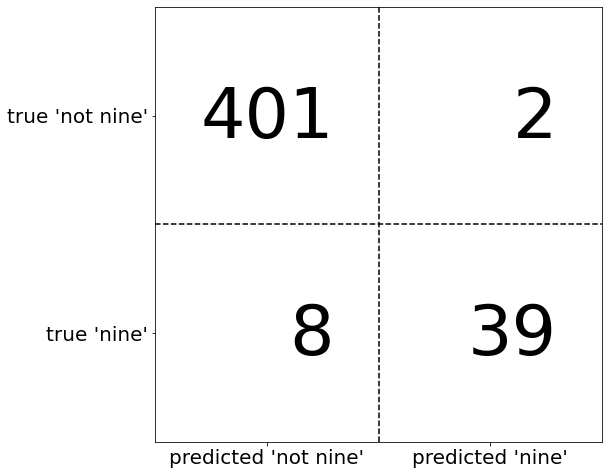

In [21]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

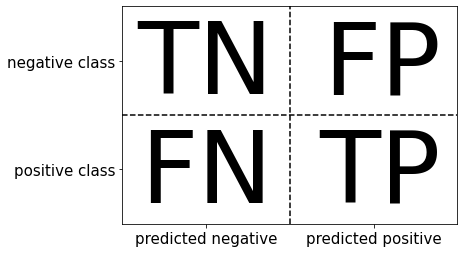

In [22]:
mglearn.plots.plot_binary_confusion_matrix()

In [23]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[369  34]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[402   1]
 [  6  41]]


In [24]:
from sklearn.metrics import f1_score

In [25]:
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.12
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [28]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.92      0.91       403
        nine       0.13      0.11      0.12        47

    accuracy                           0.83       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.83      0.82       450



In [29]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [30]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mglearn.datasets import make_blobs

In [31]:
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
svc = SVC(gamma=.05).fit(X_train, y_train)

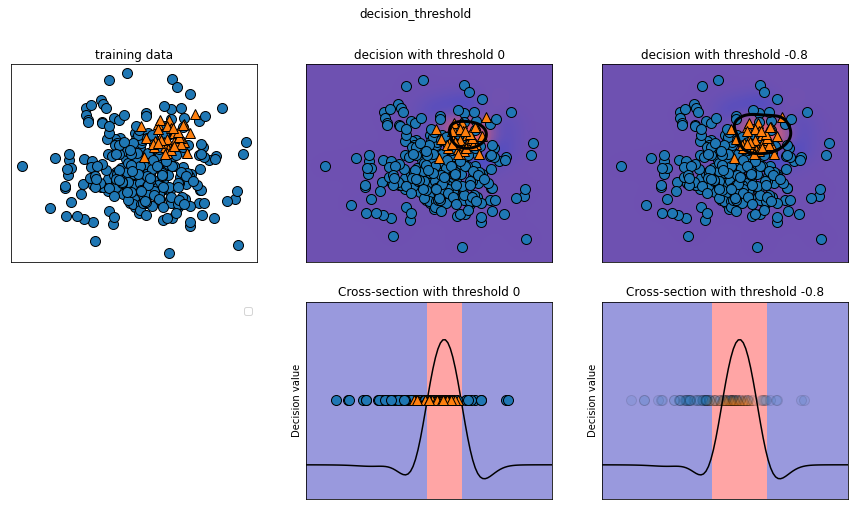

In [34]:
mglearn.plots.plot_decision_threshold()

In [35]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [36]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [37]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113

